### 1.匯入所需的工具集

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### 2.匯入已整理的資料集

In [2]:
cleaned_data = pd.read_csv(r"C:\Users\User\Desktop\python\Loan_cleaned.csv")
cleaned_data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Loan Date (DD/MM/YYYY)
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,2018/10/15
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,2016/3/25
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,2013/11/11
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,2017/6/22
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,2014/6/9


### 3.數據視覺化

In [3]:
sns.set_palette("pastel")
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] =True

**3.1 違約比率**

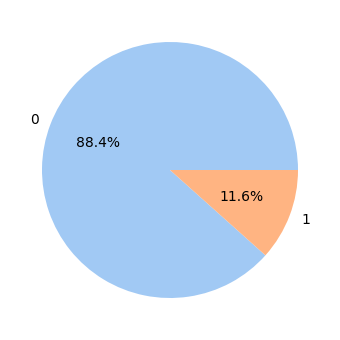

In [4]:
ld_count = cleaned_data['Default'].value_counts()
ld_label = ld_count.index
plt.pie(ld_count, labels=ld_label, autopct='%.1f%%')
plt.show()

從以上餅圖來看，不違約數(0)多於違約數(1)，約2成的違約率

**3.2年齡與是否違約**

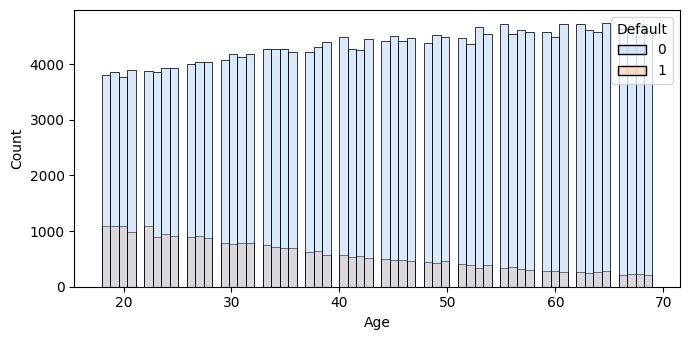

In [5]:
sns.histplot(cleaned_data, x='Age', hue= 'Default', alpha=0.4)
plt.show()

從以上的直方圖來看，年齡越小，違約率就越高。

**3.3就業類型與是否違約**

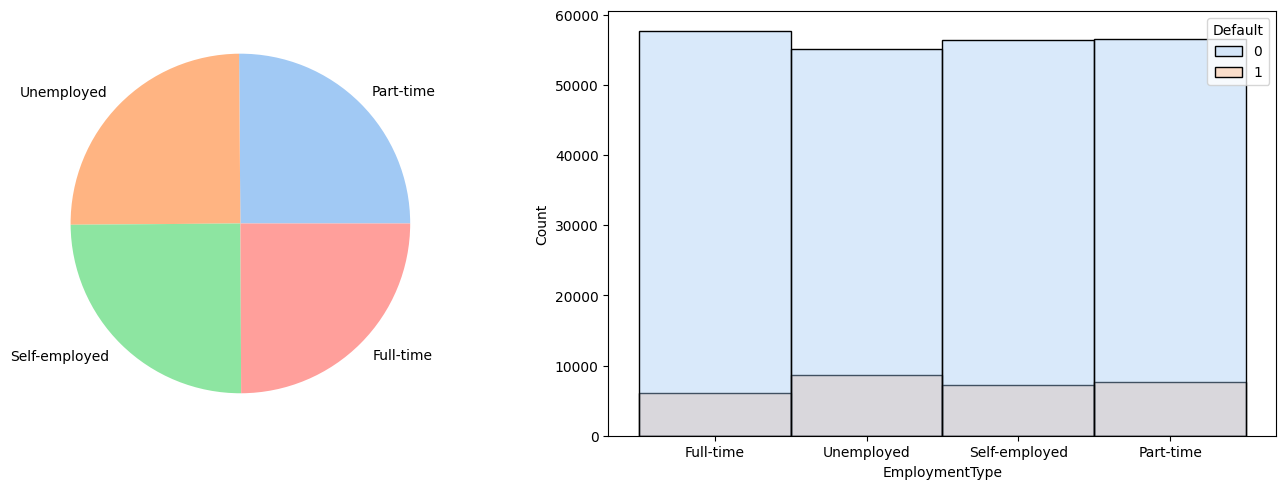

In [6]:
figure, axes = plt.subplots(1,2, figsize=(14, 5))
ET_count = cleaned_data['EmploymentType'].value_counts()
ET_label = ET_count.index
axes[0].pie(ET_count, labels=ET_label)
sns.histplot(cleaned_data, x='EmploymentType', hue= 'Default', alpha=0.4)
plt.show()

從以上圖形來看，就業類型分佈平均；此外，Full-time的違約率比較其他都少。

### 4.分析數據

我們創建一個新的DataFrame,作為我們進行邏輯回歸分析所用的數據。

In [7]:
lr_data = cleaned_data.copy()
lr_data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Loan Date (DD/MM/YYYY)
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,2018/10/15
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,2016/3/25
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,2013/11/11
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,2017/6/22
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,2014/6/9


**1.移除不會影響是否違約的變量。**

In [8]:
lr_data = lr_data.drop(['LoanID', 'Loan Date (DD/MM/YYYY)'], axis=1)
lr_data.head(10)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


**2.把分類變量轉換為`category`類型。**

In [9]:
##cleaned_data['EmploymentType'].value_counts()
##cleaned_data['MaritalStatus'].value_counts()
##cleaned_data['HasMortgage'].value_counts()
##cleaned_data['HasDependents'].value_counts()
##cleaned_data['LoanPurpose'].value_counts()
##cleaned_data['HasCoSigner'].value_counts()

In [10]:
##'Education','EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner'
lr_data['Education']= pd.Categorical(lr_data['Education'],categories=["Bachelor's","High School","Master's","PhD"])
lr_data['EmploymentType']= pd.Categorical(lr_data['EmploymentType'],categories=["Full-time","Part-time","Unemployed","Self-employed"])
lr_data['MaritalStatus']= pd.Categorical(lr_data['MaritalStatus'],categories=["Married","Divorced","Single"])
lr_data['HasMortgage']= pd.Categorical(lr_data['HasMortgage'],categories=["Yes","No"])
lr_data['HasDependents']= pd.Categorical(lr_data['HasDependents'],categories=["Yes","No"])
lr_data['LoanPurpose']= pd.Categorical(lr_data['LoanPurpose'],categories=["Business","Home","Education","Other","Auto"])
lr_data['HasCoSigner']= pd.Categorical(lr_data['HasCoSigner'],categories=["Yes","No"])

**3.數據中存在分類變量，我們需要引入虛擬變量，也就是用0和1分別表示是否屬該類別。**

In [11]:
lr_data = pd.get_dummies(lr_data, drop_first=True, columns=['Education','EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner'], dtype=int)
lr_data.head(10)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_Self-employed,MaritalStatus_Divorced,MaritalStatus_Single,HasMortgage_No,HasDependents_No,LoanPurpose_Home,LoanPurpose_Education,LoanPurpose_Other,LoanPurpose_Auto,HasCoSigner_No
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,0,1,0,0,0,0,0,1,0,0
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,0,0,0,1,1,0,0,1,0,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,0,1,0,0,0,0,0,0,1,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,0,0,0,1,1,0,0,0,0,1
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,0,1,0,1,0,0,0,0,1,1
5,25,90298,90448,720,18,2,22.72,24,0.10,1,...,0,0,1,0,1,0,0,0,0,0
6,38,111188,177025,429,80,1,19.11,12,0.16,0,...,0,0,1,0,1,1,0,0,0,0
7,56,126802,155511,531,67,4,8.15,60,0.43,0,...,0,0,0,1,1,1,0,0,0,0
8,36,42053,92357,827,83,1,23.94,48,0.20,1,...,1,1,0,0,1,0,1,0,0,1
9,40,132784,228510,480,114,4,9.09,48,0.33,0,...,1,0,0,0,1,0,0,1,0,0


In [12]:
lr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  int64  
 1   Income                        255347 non-null  int64  
 2   LoanAmount                    255347 non-null  int64  
 3   CreditScore                   255347 non-null  int64  
 4   MonthsEmployed                255347 non-null  int64  
 5   NumCreditLines                255347 non-null  int64  
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  int64  
 8   DTIRatio                      255347 non-null  float64
 9   Default                       255347 non-null  int64  
 10  Education_High School         255347 non-null  int64  
 11  Education_Master's            255347 non-null  int64  
 12  Education_PhD                 255347 non-nul

**4.我們把因變量和自變量劃分出來，因變量為`Default`變量。**

In [13]:
y = lr_data['Default']

**5.對所有自變量查看之間的相關性，如果其中有些變量之間相關性很高，會導致共線性。**

In [14]:
X = lr_data.drop(['Default'],axis=1)
X.corr().abs() > 0.8

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,...,EmploymentType_Self-employed,MaritalStatus_Divorced,MaritalStatus_Single,HasMortgage_No,HasDependents_No,LoanPurpose_Home,LoanPurpose_Education,LoanPurpose_Other,LoanPurpose_Auto,HasCoSigner_No
Age,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Income,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
LoanAmount,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CreditScore,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
MonthsEmployed,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
NumCreditLines,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
InterestRate,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
LoanTerm,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
DTIRatio,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Education_High School,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


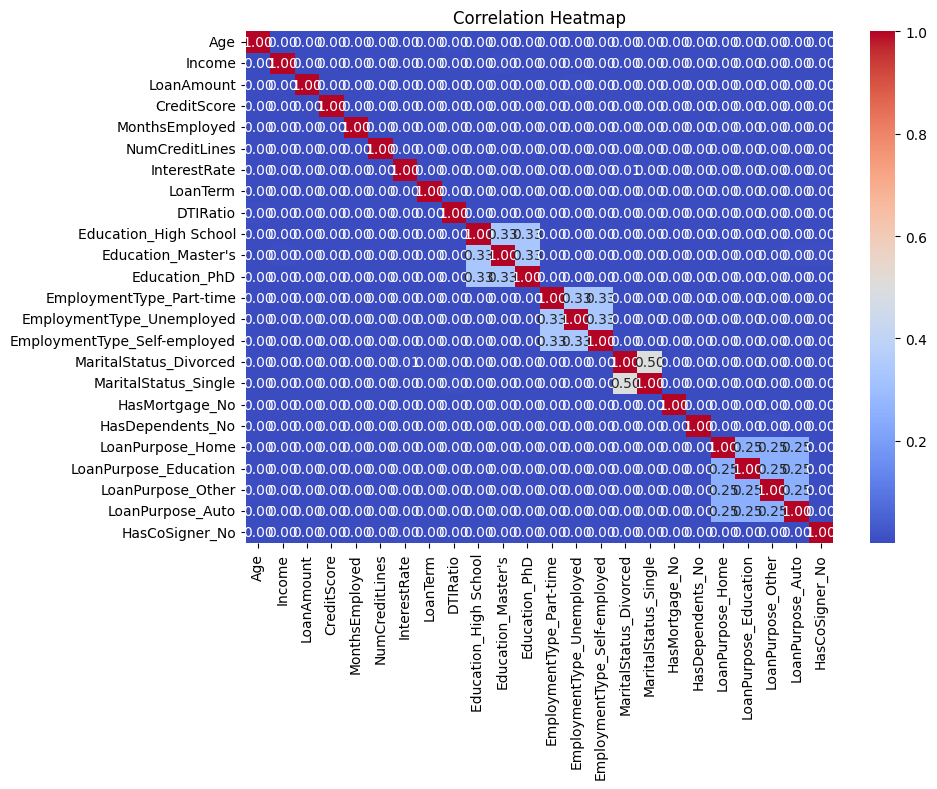

In [15]:
corr_matrix = X.corr().abs()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

從以上輸出來看，相關係數絕對值都小於0.8，因此我們不需要移除任何變量。

**6.給模型線性方程添加截距**

In [16]:
X = sm.add_constant(X)

**7.用Logit函數來優化得到邏輯回歸模型的參數值。**

In [17]:
model = sm.Logit(y,X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.315863
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:               255347
Model:                          Logit   Df Residuals:                   255322
Method:                           MLE   Df Model:                           24
Date:                Sun, 28 Dec 2025   Pseudo R-squ.:                  0.1205
Time:                        14:45:06   Log-Likelihood:                -80655.
converged:                       True   LL-Null:                       -91705.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.3287      0.053    -25.052      0.000      -1.433      -1.225
Age                             -0.0394      0.000    -84.983      0.000      -0.040      -0.039
Income                       -8.819e-06   1.71e-07    -51.699      0.000   -9.15e-06   -8.48e-06
LoanAmount                    4.257e-06   9.35e-08     45.555      0.000    4.07e-06    4.44e-06
CreditScore                     -0.0008   4.11e-05    -18.526      0.000      -0.001      -0.001
MonthsEmployed                  -0.0098      0.000    -51.104      0.000      -0.010      -0.009
NumCreditLines                   0.0887      0.006     15.193      0.000       0.077       0.100
InterestRate                     0.0690      0.001     67.645      0.000       0.067       0.071
LoanTerm                       8.98e-05      0.000      0.234      0.815      -0.001       0.001
DTIRatio                         0.2811      0.028      9.969      0.000       0.226       0.336
Education_High School            0.0781      0.018      4.380      0.000       0.043       0.113
Education_Master's              -0.1327      0.018     -7.180      0.000      -0.169      -0.096
Education_PhD                   -0.1786      0.019     -9.612      0.000      -0.215      -0.142
EmploymentType_Part-time         0.2816      0.019     14.752      0.000       0.244       0.319
EmploymentType_Unemployed        0.4444      0.019     23.753      0.000       0.408       0.481
EmploymentType_Self-employed     0.2362      0.019     12.258      0.000       0.198       0.274
MaritalStatus_Divorced           0.2300      0.016     14.320      0.000       0.199       0.262
MaritalStatus_Single             0.1641      0.016     10.122      0.000       0.132       0.196
HasMortgage_No                   0.1570      0.013     12.051      0.000       0.131       0.183
HasDependents_No                 0.2434      0.013     18.646      0.000       0.218       0.269
LoanPurpose_Home                -0.2386      0.021    -11.454      0.000      -0.279      -0.198
LoanPurpose_Education           -0.0624      0.020     -3.082      0.002      -0.102      -0.023
LoanPurpose_Other               -0.0528      0.020     -2.606      0.009      -0.092      -0.013
LoanPurpose_Auto                -0.0439      0.020     -2.170      0.030      -0.084      -0.004
HasCoSigner_No                   0.2710      0.013     20.747      0.000       0.245       0.297
================================================================================================
"""

當我們把顯著區間設定為0.05時，以上結果的P值可以看出，模型認為`LoanTerm`、`LoanPurpose_Education`和`LoanPurpose_Other`沒有顯著影響。

**8.理解某些自變量系數的實際含義，需要計算自然常數的次方。**

In [18]:
#Age
np.exp(-0.0394)

np.float64(0.9613660857925073)

以上結果說明，年齡每增加1歲，違約率會下降3.9%。

In [19]:
#Income
np.exp(-8.819e-06 *10000)

np.float64(0.9155868986851852)

以上結果說明，收入每增加10000萬元，違約率會下降8.5%。

In [20]:
#Unemployed
np.exp(0.4444)

np.float64(1.5595541825472332)

以上結果說明，失業人們的違約率比起全職人們的違約率高出56%。

In [21]:
#DTIRatio
np.exp(0.2811)

np.float64(1.3245860559181397)

以上結果說明，DTI每增加1單位，違約率會增加32%。

## 5.預測模型

匯入`Random_data`資料集，Random_Loan是隨機所產生100個人的違約數據(其中包含所有邏輯回歸模型的變量)，用機器學習的方法預測人們的違約情況。  

In [22]:
test_data = pd.read_csv(r"C:\Users\User\Desktop\python\Random_Loan.csv")
test_data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Loan Date (DD/MM/YYYY),InterestRate,Default
0,XAJI0Y6DPB,56,129752,115078,697,61,3,48,0.25,PhD,Part-time,Married,No,No,Education,Yes,2014/02/11,16.30,0
1,HSAHXTHV3A,69,63984,85623,576,22,4,36,0.47,Bachelor's,Part-time,Single,No,Yes,Home,Yes,2017/02/13,21.38,0
2,3ZMF8MDD4V,46,55774,27671,803,8,1,60,0.38,Master's,Self-employed,Married,Yes,Yes,Business,No,2017/01/09,15.88,0
3,30T9NT3W5U,32,17568,161256,691,11,1,48,0.57,PhD,Full-time,Divorced,Yes,Yes,Education,No,2013/09/06,21.25,0
4,ZBIKCIDKWN,60,135151,98384,434,116,4,60,0.16,Master's,Full-time,Divorced,No,No,Home,No,2017/06/19,21.90,1


給模型中的分類變量引入虛擬變量，但在引入前我們需要先把分類變量的類型轉換為`Category`，並且通過categories參數，讓程序知道所有可能的分類值。

In [23]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LoanID                  100 non-null    object 
 1   Age                     100 non-null    int64  
 2   Income                  100 non-null    int64  
 3   LoanAmount              100 non-null    int64  
 4   CreditScore             100 non-null    int64  
 5   MonthsEmployed          100 non-null    int64  
 6   NumCreditLines          100 non-null    int64  
 7   LoanTerm                100 non-null    int64  
 8   DTIRatio                100 non-null    float64
 9   Education               100 non-null    object 
 10  EmploymentType          100 non-null    object 
 11  MaritalStatus           100 non-null    object 
 12  HasMortgage             100 non-null    object 
 13  HasDependents           100 non-null    object 
 14  LoanPurpose             100 non-null    obj

In [24]:
##'Education','EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner'
test_data['Education']= pd.Categorical(test_data['Education'],categories=["Bachelor's","High School","Master's","PhD"])
test_data['EmploymentType']= pd.Categorical(test_data['EmploymentType'],categories=["Full-time","Part-time","Unemployed","Self-employed"])
test_data['MaritalStatus']= pd.Categorical(test_data['MaritalStatus'],categories=["Married","Divorced","Single"])
test_data['HasMortgage']= pd.Categorical(test_data['HasMortgage'],categories=["Yes","No"])
test_data['HasDependents']= pd.Categorical(test_data['HasDependents'],categories=["Yes","No"])
test_data['LoanPurpose']= pd.Categorical(test_data['LoanPurpose'],categories=["Business","Home","Education","Other","Auto"])
test_data['HasCoSigner']= pd.Categorical(test_data['HasCoSigner'],categories=["Yes","No"])

In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   LoanID                  100 non-null    object  
 1   Age                     100 non-null    int64   
 2   Income                  100 non-null    int64   
 3   LoanAmount              100 non-null    int64   
 4   CreditScore             100 non-null    int64   
 5   MonthsEmployed          100 non-null    int64   
 6   NumCreditLines          100 non-null    int64   
 7   LoanTerm                100 non-null    int64   
 8   DTIRatio                100 non-null    float64 
 9   Education               100 non-null    category
 10  EmploymentType          100 non-null    category
 11  MaritalStatus           100 non-null    category
 12  HasMortgage             100 non-null    category
 13  HasDependents           100 non-null    category
 14  LoanPurpose             100

下一步，給模型的分類變量引入虛擬變量

In [26]:
test_data = pd.get_dummies(test_data, drop_first=True, columns=['Education','EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner'], dtype=int)
test_data.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,LoanTerm,DTIRatio,Loan Date (DD/MM/YYYY),...,EmploymentType_Self-employed,MaritalStatus_Divorced,MaritalStatus_Single,HasMortgage_No,HasDependents_No,LoanPurpose_Home,LoanPurpose_Education,LoanPurpose_Other,LoanPurpose_Auto,HasCoSigner_No
0,XAJI0Y6DPB,56,129752,115078,697,61,3,48,0.25,2014/02/11,...,0,0,0,1,1,0,1,0,0,0
1,HSAHXTHV3A,69,63984,85623,576,22,4,36,0.47,2017/02/13,...,0,0,1,1,0,1,0,0,0,0
2,3ZMF8MDD4V,46,55774,27671,803,8,1,60,0.38,2017/01/09,...,1,0,0,0,0,0,0,0,0,1
3,30T9NT3W5U,32,17568,161256,691,11,1,48,0.57,2013/09/06,...,0,1,0,0,0,0,1,0,0,1
4,ZBIKCIDKWN,60,135151,98384,434,116,4,60,0.16,2017/06/19,...,0,1,0,1,1,1,0,0,0,1
5,NHJ7XVG0FN,25,148767,178179,494,0,3,12,0.88,2016/02/05,...,0,1,0,0,0,1,0,0,0,0
6,9XUY41IBLJ,38,139375,91202,700,57,2,60,0.89,2015/02/17,...,1,0,0,1,0,0,0,1,0,0
7,H75LXO6QJI,56,54504,245965,332,0,2,60,0.66,2014/05/16,...,0,1,0,0,1,0,0,0,0,1
8,UJV6OH9SDB,36,28986,56663,759,110,1,24,0.53,2018/02/06,...,1,0,1,0,1,1,0,0,0,1
9,DW2PCN9T84,40,76858,20708,769,33,3,24,0.35,2014/01/11,...,0,0,1,0,1,0,1,0,0,0


查看模型需要的輸入變量。

In [27]:
model.params

const                          -1.328713
Age                            -0.039434
Income                         -0.000009
LoanAmount                      0.000004
CreditScore                    -0.000761
MonthsEmployed                 -0.009805
NumCreditLines                  0.088657
InterestRate                    0.069039
LoanTerm                        0.000090
DTIRatio                        0.281087
Education_High School           0.078084
Education_Master's             -0.132692
Education_PhD                  -0.178629
EmploymentType_Part-time        0.281609
EmploymentType_Unemployed       0.444388
EmploymentType_Self-employed    0.236159
MaritalStatus_Divorced          0.230029
MaritalStatus_Single            0.164129
HasMortgage_No                  0.157013
HasDependents_No                0.243408
LoanPurpose_Home               -0.238613
LoanPurpose_Education          -0.062350
LoanPurpose_Other              -0.052797
LoanPurpose_Auto               -0.043917
HasCoSigner_No  

構建我們輸入給模型進行預測的變量，需要和模型訓練時的輸入一致。

In [28]:
X_test = test_data[['Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','DTIRatio','Education_High School',"Education_Master's",'Education_PhD','EmploymentType_Part-time','EmploymentType_Unemployed','EmploymentType_Self-employed','MaritalStatus_Divorced','MaritalStatus_Single','HasMortgage_No','HasDependents_No','LoanPurpose_Home','LoanPurpose_Education','LoanPurpose_Other','LoanPurpose_Auto','HasCoSigner_No']]
X_test = sm.add_constant(X_test)

調用邏輯回歸模型的`predict`方法，獲得預測違約概率。

In [29]:
predicted_value = model.predict(X_test)
predicted_value

0     0.031899
1     0.070887
2     0.073486
3     0.329120
4     0.029650
        ...   
95    0.118611
96    0.073024
97    0.049231
98    0.060755
99    0.187578
Length: 100, dtype: float64

我們找出平均概率後，利用平均違約率進行風險分層。

In [39]:
df_test = X_test.copy()
df_test["DR"] = predicted_value

threshold = predicted_value.mean()

df_test["Risk_Level"] = np.where(
    df_test["DR"] >= threshold,
    "Medium-High Risk",
    "Low Risk"
)

In [42]:
df_test[["DR", "Risk_Level"]].head(10)

,DR,Risk_Level
0,0.031899,Low Risk
1,0.070887,Low Risk
2,0.073486,Low Risk
3,0.329120,Medium-High Risk
4,0.029650,Low Risk
5,0.241461,Medium-High Risk
6,0.091730,Low Risk
7,0.362838,Medium-High Risk
8,0.106463,Low Risk
9,0.098575,Low Risk
